In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Filtering the dataset for digits 3 and 8 as my last digits of the student id were 3 and 3.
train_filter = np.where((train_labels == 3) | (train_labels == 7))
test_filter = np.where((test_labels == 3) | (test_labels == 7))

train_images, train_labels = train_images[train_filter], train_labels[train_filter]
test_images, test_labels = test_images[test_filter], test_labels[test_filter]

# Convert labels to binary: 0 for digit 3, 1 for digit 8
train_labels_binary = np.where(train_labels == 3, 0, 1)
test_labels_binary = np.where(test_labels == 3, 0, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_labels_binary = to_categorical(train_labels_binary)
test_labels_binary = to_categorical(test_labels_binary)

In [3]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax')) # 2 because we have two classes

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
history = model.fit(train_images, train_labels_binary, epochs=20, 
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0684 - accuracy: 0.9785 - val_loss: 0.0141 - val_accuracy: 0.9958
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0093 - val_accuracy: 0.9975
Epoch 3/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0082 - val_accuracy: 0.9962
Epoch 4/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0076 - val_accuracy: 0.9962
Epoch 5/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0115 - val_accuracy: 0.9946
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0096 - val_accuracy: 0.9967
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0072 - val_accuracy: 0.9967
Epoch 

62/62 [==============================] - 0s 2ms/step - loss: 9.8511e-04 - accuracy: 0.9995
Test accuracy: 0.9994959831237793
62/62 [==============================] - 0s 2ms/step


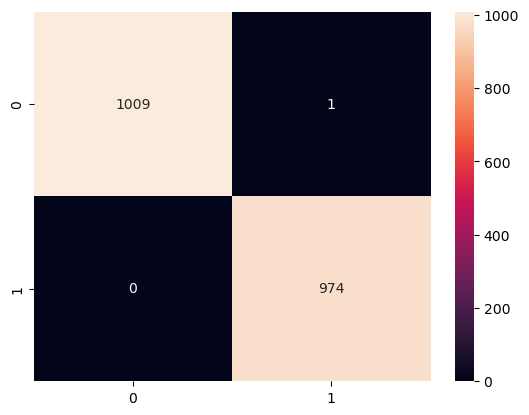

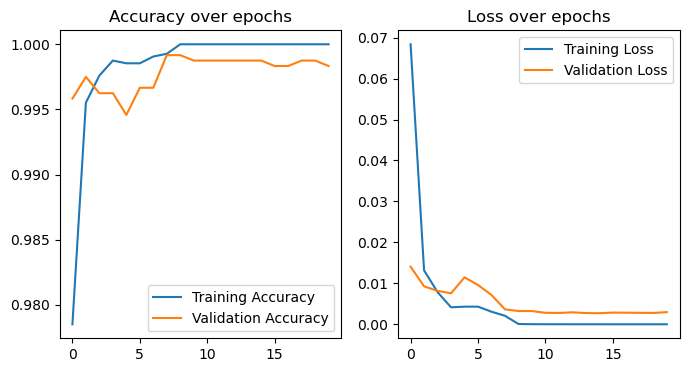

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss, test_acc = model.evaluate(test_images, test_labels_binary)
print('Test accuracy:', test_acc)


predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_binary, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d')

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

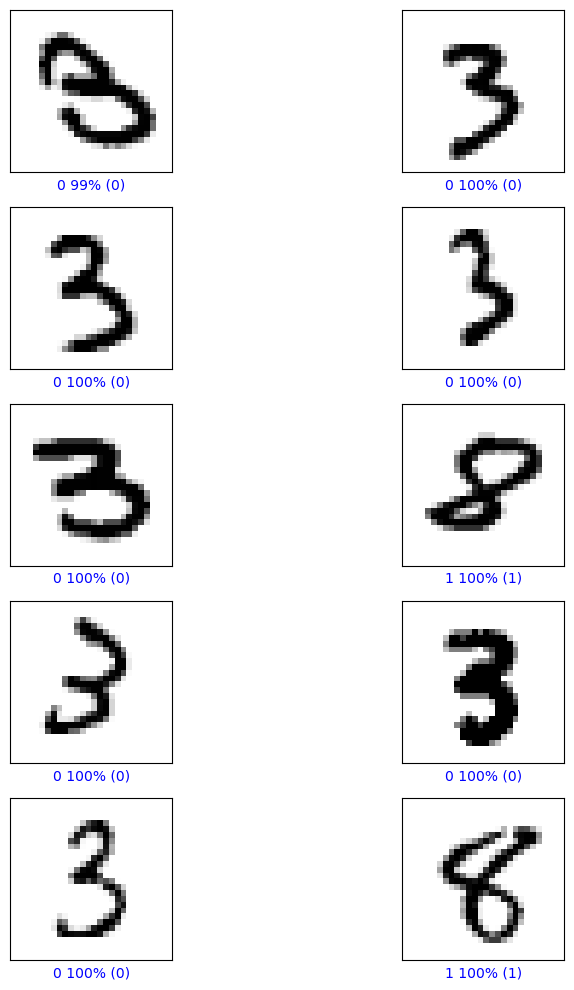

In [7]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i].reshape(28, 28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def display_prediction_examples(num_images=5):
    num_rows = num_images // 2
    num_cols = 2
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], true_classes, test_images)
    plt.tight_layout()
    plt.show()


display_prediction_examples(num_images=10)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0